# Практическая работа №5 
## Тема: «Логистическая регрессия»
### Выполнил студент: ???
#### ВАРИАНТ: (ваш dataset [название, ссылка])


Линейная регрессия и логистическая регрессия являются двумя популярными статистическими методами, используемыми для анализа данных. Они оба используются для прогнозирования значений на основе набора входных данных, но они применяются в разных контекстах и имеют разные цели.


### Логистическая регрессия

Простейший алгоритм классификации, пришел к нам из мира статистики. Позволяет разделять на два класса несложные объекты, чье состояние управляется и описывается небольшим числом параметров.

Логистическая регрессия выдает ответ в виде числа в промежутке от 0 до 1. Если число ниже определенного порога значения — то объект относится к первому классу объектов, а если выше — то ко второму. Калибровка порогового значения для разделения объектов на классы подбирается в ходе калибровки алгоритма.Логистическая регрессия, с другой стороны, используется для прогнозирования вероятности возникновения события на основе одного или нескольких независимых переменных. Она строит логистическую кривую, которая представляет собой S-образную кривую, используемую для моделирования вероятности.

**Основные характеристики логистической регрессии:**

- **Цель:** Прогнозирование вероятности возникновения события.
- **Модель:** Логистическая функция независимых переменных.
- **Применение:** Там, где требуется несложная классификация малого числа объектов на малое число классов. Используется в статистике, экономике, социологии и других областях для прогнозирования вероятности.

- **Плюсы.** Скорость и наглядность.

- **Минусы.** Может классифицировать только относительно простые объекты. Не подходит для разделения объектов на несколько классов, ответ этого алгоритма — по сути, двоичный сигнал типа «да-нет».

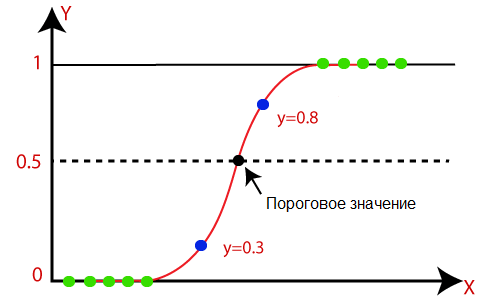




### Отличия

1. **Цель прогнозирования:** Линейная регрессия предназначена для прогнозирования непрерывных значений, в то время как логистическая регрессия используется для прогнозирования вероятности возникновения события.

2. **Функция модели:** Линейная регрессия использует линейную функцию для моделирования, в то время как логистическая регрессия использует логистическую функцию.

3. **Применение:** Линейная регрессия широко используется в различных областях для прогнозирования непрерывных переменных, в то время как логистическая регрессия часто используется в статистике и социологии для прогнозирования вероятности.

4. **Результаты:** Линейная регрессия дает прямое значение зависимой переменной, в то время как логистическая регрессия дает вероятность, что событие произойдет.

Выбор между линейной и логистической регрессией зависит от целей анализа и типа данных, с которыми вы работаете.

В контексте машинного обучения, логистическая регрессия часто используется для бинарной классификации, где цель состоит в том, чтобы предсказать, к какой из двух групп относится объект.

Пример Применения Логистической Регрессии на Датасете Титаник Для примера применения логистической регрессии на датасете Титаник, мы можем попытаться предсказать, выживет ли пассажир на Титанике на основе таких признаков, как пол, возраст, класс пассажира и другие.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# Загрузка данных
#data = pd.read_csv('titanic.csv')

# Загрузка датасета
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Обработка пропущенных значений
#data = data.dropna()
data.Age = data.Age.fillna(data.Age.mean())

# Выбор признаков
features = data[['Pclass', 'Age', 'Sex']]
target = data['Survived']

In [ ]:
features

,Pclass,Age,Sex
0,3,22.000000,male
1,1,38.000000,female
2,3,26.000000,female
3,1,35.000000,female
4,3,35.000000,male
...,...,...,...
886,2,27.000000,male
887,1,19.000000,female
888,3,29.699118,female
889,1,26.000000,male


<AxesSubplot:>

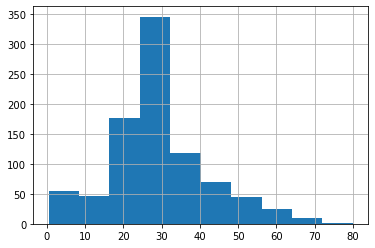

In [ ]:
features.Age.hist()

In [ ]:
gender_mapping = {'male': 0, 'female': 1}

#features = features['Sex'].replace(gender_mapping)
features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})

In [ ]:
features

,Pclass,Age,Sex
0,3,22.000000,0
1,1,38.000000,1
2,3,26.000000,1
3,1,35.000000,1
4,3,35.000000,0
...,...,...,...
886,2,27.000000,0
887,1,19.000000,1
888,3,29.699118,1
889,1,26.000000,0


In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Создание и обучение модели
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Этот пример демонстрирует базовый процесс применения логистической регрессии для бинарной классификации на датасете Титаник. Важно отметить, что выбор признаков и их преобразование могут сильно влиять на результаты модели, поэтому важно проводить эксперименты с различными наборами признаков и методами их обработки.

**Задача**

Определить с какой вероятностью выживет пассажир возростом 25 лет

Для решения этой задачи мы будем использовать библиотеку pandas для работы с данными, numpy для математических операций, и sklearn для построения и оценки модели логистической регрессии. В качестве примера датасета мы будем использовать датасет Titanic, который доступен в библиотеке seaborn.

Установка необходимых библиотек: 

Если у вас еще не установлены необходимые библиотеки, вы можете установить их с помощью команды pip install pandas numpy seaborn sklearn.

Загрузка и подготовка данных: Загрузим датасет Titanic, отфильтруем его, чтобы оставить только пассажиров возрастом 25 лет, и подготовим данные для обучения модели.
Построение и обучение модели: Используем логистическую регрессию из sklearn для обучения модели на подготовленных данных.
Оценка модели: Оценим качество модели, используя тестовые данные.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Загрузка датасета Titanic
titanic = sns.load_dataset('titanic')

# Фильтрация данных для пассажиров возрастом 25 лет
titanic_25 = titanic[titanic['age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X = titanic_25[['pclass', 'sex', 'embarked']].dropna()
y = titanic_25['survived']

# Преобразование категориальных переменных в числовые
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['embarked'] = X['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy}")


Accuracy (выживет с вероятносью:): 0.8


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')


from sklearn.metrics import classification_report, confusion_matrix

# Загрузка датасета Titanic
titanic = sns.load_dataset('titanic')

# Фильтрация данных для пассажиров возрастом 25 лет
titanic_25 = titanic[titanic['age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X = titanic_25[['pclass', 'sex', 'embarked', 'fare']].dropna()
y = titanic_25['survived']

# Преобразование категориальных переменных в числовые
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['embarked'] = X['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
#X['alone'] = X['alone'].map({False: 0, True: 1})

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



#### Задание 1. Загрузить данные из dataset "Титаник" 

#### Задание 2. Произвести предобработку данных dataset "Титаник" и сохранить результаты каждый в отдельный датафрейм
1. Удалить все путые заначения и сохранить результаты в датафрейм df_del
2. Замена на конкретное значение все путые  и сохранить результаты в датафрейм df_num
3. Заменить все путые заначения на среднее значение и сохранить результаты в датафрейм df_means
4. Заменить все путые заначения на медеанные значение и сохранить результаты в датафрейм df_medians
5. Замена на предыдущее или следующее значение и сохранить результаты в датафрейм df_fb_fill

#### Задание 3. Приметить к каждому датафрейму алгоритм логистической регресси

#### Задание 4. Произвести оценку обученности модели разными метриками
1. accuracy
2. recall
3. Precision 
4. F1-Score

#### Задание 5. Определить наиболее эффективную метрику


#### Задание 6. Загрузить ваш dataset и произвести его описание



#### Задание 7. Произвести предобработку вашего dataset  и сохранить результаты каждый в отдельный датафрейм
1. Удалить все путые заначения и сохранить результаты в датафрейм mydf_del
2. Замена на конкретное значение все путые  и сохранить результаты в датафрейм mydf_num
3. Заменить все путые заначения на среднее значение и сохранить результаты в датафрейм mydf_means
4. Заменить все путые заначения на медеанные значение и сохранить результаты в датафрейм mydf_medians
5. Замена на предыдущее или следующее значение и сохранить результаты в датафрейм mydf_fb_fill


#### Задание 8. Приметить к каждому датафрейму алгоритм линейной регресси

#### Задание 9. Произвести оценку обученности модели разными метриками
1. accuracy
2. recall
3. Precision 
4. F1-Score

#### Задание 9. Произвести оценку обученности модели разными метриками
1. accuracy
2. recall
3. Precision 
4. F1-Score


#### Задание 10. Определить наиболее эффективную метрику